# This is a Machine Learning Project used with a single variable
* Populations
* Profits 


### Loading the required Libraries

In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [115]:
warnings.filterwarnings('ignore') 
%matplotlib inline

### Read Data From CSV File

In [116]:
dataset = pd.read_csv('dataset.csv', names=['Populations', 'Profits'], header=None)

### Statistical Measurement

In [117]:
type(dataset) 

pandas.core.frame.DataFrame

In [118]:
first_5_rows = dataset.head()
first_5_rows

,Populations,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [119]:
last_5_rows = dataset.tail()
last_5_rows

,Populations,Profits
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [120]:
pd.options.display.min_rows = 60 

In [121]:
dataset.head(20).style.background_gradient(cmap='Reds')

,Populations,Profits
0,6.110100,17.592000
1,5.527700,9.130200
2,8.518600,13.662000
3,7.003200,11.854000
4,5.859800,6.823300
5,8.382900,11.886000
6,7.476400,4.348300
7,8.578100,12.000000
8,6.486200,6.598700
9,5.054600,3.816600


In [122]:
type(first_5_rows)

pandas.core.frame.DataFrame

In [123]:
type(last_5_rows)

pandas.core.frame.DataFrame

In [124]:
dataset.columns

Index(['Populations', 'Profits'], dtype='object')

In [125]:
dataset.describe() 

,Populations,Profits
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Populations  97 non-null     float64
 1   Profits      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [127]:
dataset.dtypes

Populations    float64
Profits        float64
dtype: object

### The highiest number of populations

In [128]:
dataset['Populations'].max()

22.203

### The lowiest number of Populations

In [129]:
dataset['Populations'].min()

5.0269

### Shape of the dataset

In [130]:
dataset.shape

(97, 2)

### The row contains the lowest number of populations

In [131]:
dataset[dataset['Populations'] == dataset['Populations'].min()].style.background_gradient(cmap='Blues')

,Populations,Profits
74,5.026900,-2.680700


### The row contains the highest number of populations

In [132]:
dataset[dataset['Populations'] == dataset['Populations'].max()]

,Populations,Profits
29,22.203,24.147


### The row contains the lowest amount of profit

In [133]:
dataset[dataset['Profits'] == dataset['Profits'].min()]

,Populations,Profits
74,5.0269,-2.6807


### The row contains the highest amount of profit

In [134]:
dataset[dataset['Profits'] == dataset['Profits'].max()]

,Populations,Profits
29,22.203,24.147


In [135]:
dataset.sum()

Populations    791.5006
Profits        566.3961
dtype: float64

In [136]:
dataset['Populations'].sum()

791.5006

In [137]:
dataset['Profits'].sum()

566.3961

### amount of null values in the dataset

In [138]:
dataset.isna().sum()

Populations    0
Profits        0
dtype: int64

### Spreate the dataset into dependent and independent

### insert a new row to the dataset contains a value of 1 at the first row as X0 = 1

In [139]:
dataset.insert(0, 'Ones', 1)
dataset.head()

,Ones,Populations,Profits
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Visualising all data using scatter

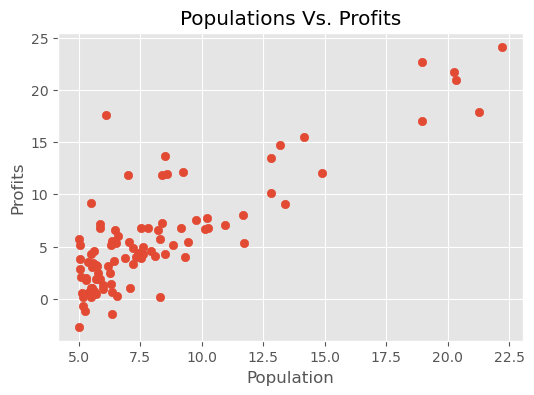

In [164]:
x_data = dataset.drop(['Profits', 'Ones'], axis=1)
y_data = dataset['Profits']

plt.figure(figsize=(6, 4))
plt.style.use('ggplot')
plt.scatter(x_data, y_data)
plt.xlabel('Population')
plt.ylabel('Profits')
plt.title('Populations Vs. Profits')
plt.show()

### Visualising the X and y data

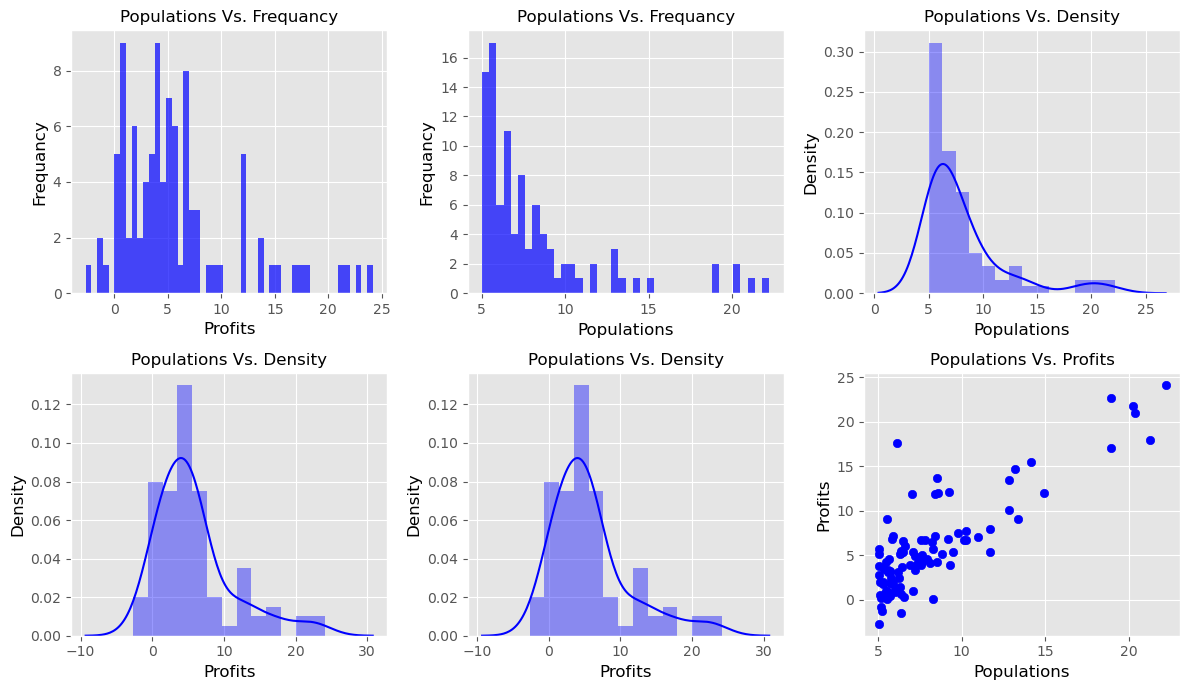

In [141]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
plt.subplot(2, 3, 1)
plt.hist(y_data, bins=50, color='blue', alpha=0.7)
plt.xlabel('Profits', fontdict={'size': 12, 'color':'black'})
plt.ylabel('Frequancy', fontdict={'color': 'black', 'size': 12})
plt.title('Populations Vs. Frequancy', fontdict={'color':'black', 'size':12})

plt.subplot(2,3,2)
plt.hist(x_data, bins=40, color='blue', alpha=0.7,)
plt.xlabel('Populations', fontdict={'size': 12, 'color':'black'})
plt.ylabel('Frequancy', fontdict={'color': 'black', 'size': 12})
plt.title('Populations Vs. Frequancy', fontdict={'color':'black', 'size':12})

plt.subplot(2,3,3)
sns.distplot(x_data, color='b')
plt.xlabel('Populations', fontdict={'size': 12, 'color':'black'})
plt.ylabel('Density', fontdict={'color': 'black', 'size': 12})
plt.title('Populations Vs. Density', fontdict={'color':'black', 'size':12})

plt.subplot(2, 3, 4)
sns.distplot(y_data, color='b')
plt.xlabel('Profits', fontdict={'size': 12, 'color':'black'})
plt.ylabel('Density', fontdict={'color': 'black', 'size': 12})
plt.title('Populations Vs. Density', fontdict={'color':'black', 'size':12})

plt.subplot(2, 3, 5)
sns.distplot(y_data, color='b')
plt.xlabel('Profits', fontdict={'size': 12, 'color':'black'})
plt.ylabel('Density', fontdict={'color': 'black', 'size': 12})
plt.title('Populations Vs. Density', fontdict={'color':'black', 'size':12})

plt.subplot(2, 3, 6)
plt.scatter(x_data, y_data, color='b')
plt.xlabel('Populations', fontdict={'size': 12, 'color':'black'})
plt.ylabel('Profits', fontdict={'color': 'black', 'size': 12})
plt.title('Populations Vs. Profits', fontdict={'color':'black', 'size':12})

plt.grid(True)
plt.tight_layout()
plt.show()

### Visualising the corr between the columns

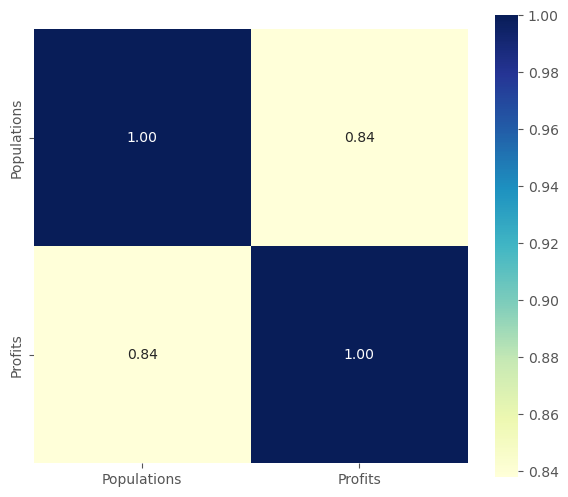

In [142]:
plt.figure(figsize= (7,6))
sns.heatmap(dataset[['Populations', 'Profits']].corr(), cmap="YlGnBu", annot=True, cbar=True, square=True, fmt='.2f') 
plt.show()

### Compute the const value

### spreat X, y data and create a matrix for theta 0 and theta1

In [143]:
X =  np.matrix(dataset.iloc[: , : dataset.shape[1] - 1].values) 
y =  np.matrix(dataset.iloc[: , dataset.shape[1] - 1 : ].values)
theta = np.matrix(np.zeros(X.shape[1]))

### Compute the cost value

In [144]:
def compute_cost(X, y, theta) : 
    
    product = np.power(((X * theta.T) - y), 2)
     
    return np.sum(product) / (2 * len(X))

error = compute_cost(X, y , theta)

In [145]:
print('error value is ' + str(error))

error value is 32.072733877455676


### Grideante decent to find the best values for theta0 and theta1 

In [146]:
def grident_decient(X, y, theta, iterations, alpha) :
    new_theta = np.matrix(np.zeros(X.shape[1]))
    cost = np.zeros(iterations)
    
    for iteration in range(iterations) : 
        error = (X * theta.T) - y
        
        for parameters in range(X.shape[1]) : 
            temp = np.multiply(error, X[ : , parameters])
            new_theta[0, parameters] = theta[0, parameters] - ((alpha * np.sum(temp)) / len(X))
        theta = new_theta 
        cost[iteration] = compute_cost(X, y, theta)
    return cost, theta

In [147]:
iterations  = 2000 
alpha       = 0.01
cost, theta = grident_decient(X, y, theta, iterations, alpha)

In [148]:
print('The perfict thetas are : ' + str(theta))

The perfict thetas are : [[-3.78806857  1.18221277]]


In [150]:
X = np.linspace(dataset['Populations'].min(), dataset['Populations'].max(), 100)
prod = theta[0, 0] + (X * theta[0, 1])
prod

array([ 2.15479682,  2.35990596,  2.5650151 ,  2.77012424,  2.97523338,
        3.18034252,  3.38545166,  3.5905608 ,  3.79566994,  4.00077908,
        4.20588822,  4.41099736,  4.6161065 ,  4.82121564,  5.02632478,
        5.23143392,  5.43654306,  5.6416522 ,  5.84676134,  6.05187048,
        6.25697962,  6.46208876,  6.6671979 ,  6.87230704,  7.07741618,
        7.28252532,  7.48763446,  7.6927436 ,  7.89785274,  8.10296188,
        8.30807102,  8.51318016,  8.7182893 ,  8.92339844,  9.12850758,
        9.33361672,  9.53872586,  9.743835  ,  9.94894414, 10.15405328,
       10.35916242, 10.56427156, 10.7693807 , 10.97448984, 11.17959898,
       11.38470812, 11.58981726, 11.7949264 , 12.00003554, 12.20514468,
       12.41025381, 12.61536295, 12.82047209, 13.02558123, 13.23069037,
       13.43579951, 13.64090865, 13.84601779, 14.05112693, 14.25623607,
       14.46134521, 14.66645435, 14.87156349, 15.07667263, 15.28178177,
       15.48689091, 15.69200005, 15.89710919, 16.10221833, 16.30

In [151]:
-3.78806857 + (5.4369 * 1.18221277)

2.6395040392129996

### Visualising The best fit line

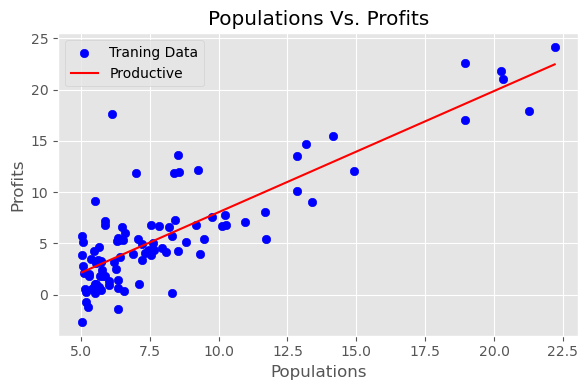

In [162]:
plt.figure(figsize=(6, 4))
plt.style.use('ggplot')
plt.scatter(dataset['Populations'], dataset['Profits'], label='Traning Data', color='blue')
plt.plot(X, prod, color='red', label='Productive')
plt.xlabel('Populations')
plt.ylabel('Profits')
plt.title('Populations Vs. Profits')
plt.legend()
plt.tight_layout()
plt.show()

### Visualising the cost Vs. the iteration and how the cost decrease each time the theta change

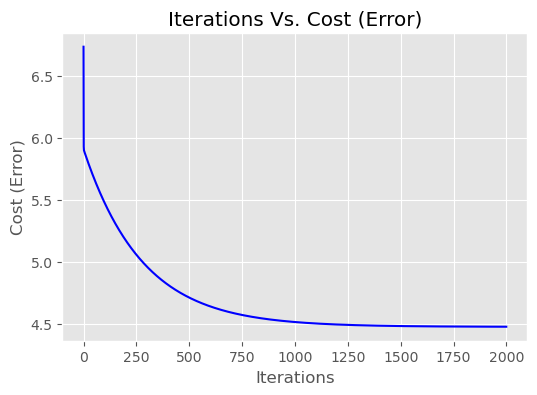

In [161]:
plt.figure(figsize=(6, 4))
plt.plot(cost, color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost (Error)')
plt.title('Iterations Vs. Cost (Error)')
plt.show()